# Week 6. Optimization. Programming Task

### For grading

In [1]:
#DO NOT CHANGE
import grading
import grading_utils

In [2]:
#DO NOT CHANGE
grader = grading.Grader(assignment_key="BiQjKqu3RIyxwEW4WigmgA", 
                        all_parts=["C2ep5", "AVd3G", "Dkq1F", "OUwhX", "vjKMj", "uWwHK"])

In [3]:
# token expires every 30 min
COURSERA_TOKEN = 'UGOcjP95KKeorlqQ'
COURSERA_EMAIL = 'slavik9709@gmail.com'

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [4]:
import numpy as np
import pandas as pd

from tqdm import tqdm  # library for progress bars

### Task 1. Reading 

In [5]:
datX = np.load('x_train.npy')
datY = np.log(np.load('y_train.npy'))
datX = pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
5,2015-04-24,4.0,2.25,2860,11545,1.0,False,4,8,1430,1430,1966,0,98005,47.588001,-122.167999
6,2014-11-20,4.0,3.00,2090,7500,1.0,False,3,7,1370,720,1986,0,98056,47.488800,-122.181999
7,2015-04-23,4.0,3.75,3450,4940,2.0,False,3,10,2570,880,2006,0,98103,47.692001,-122.337997
8,2014-11-19,3.0,3.00,3490,4500,2.5,False,3,9,3170,320,1924,0,98102,47.639400,-122.320999
9,2014-09-15,3.0,1.75,1300,2446,1.0,False,3,8,880,420,1961,0,98122,47.607101,-122.285004


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [6]:
!pip install seaborn
!pip install tqdm

You are using pip version 9.0.3, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

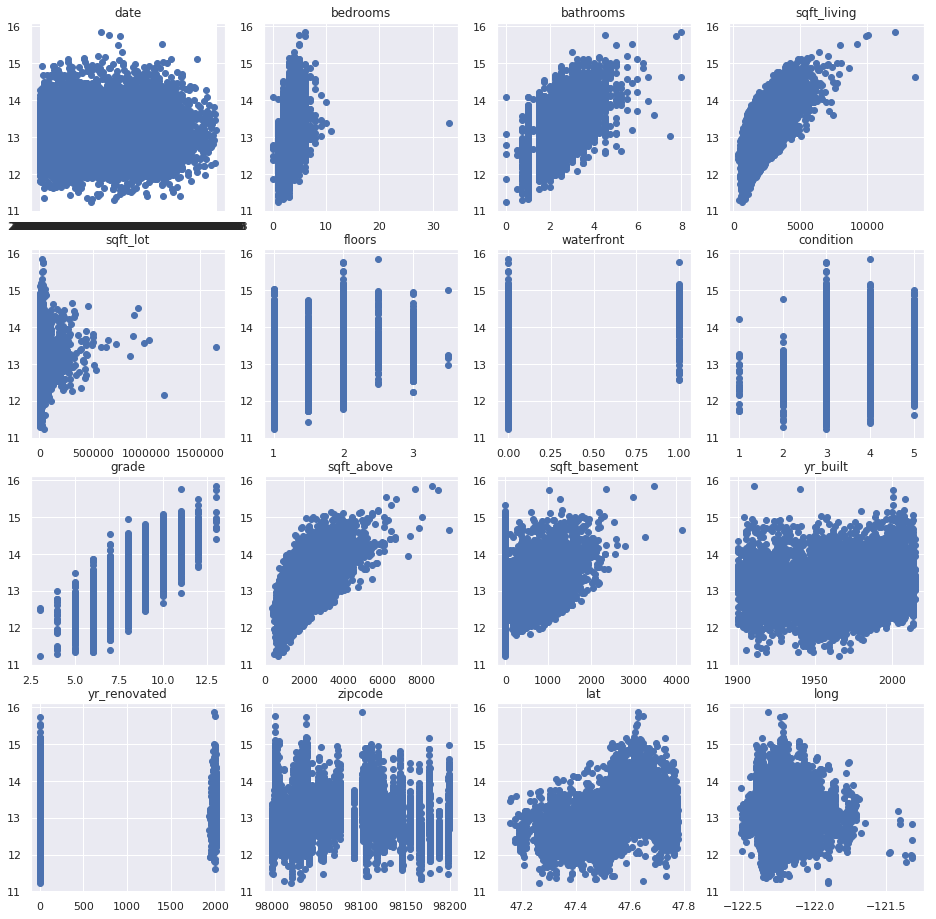

In [8]:
f, ax = plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [9]:
#your code goes here
X = datX[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above',
         'sqft_basement', 'long', 'lat']].values
N = X.shape[0]
m = X.shape[1]

Run the following cells to automatically check results of your code:

In [10]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("C2ep5", grading_utils.test_reader(X, N, m))

In [11]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$ function
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [12]:
def loss(w, X, y):
    #your code goes here
    X0 = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    lossValue = 1 / X.shape[0] * np.sum(np.power(y - X0 @ w, 2))
    return lossValue

Run the following cells to automatically check results of your code.

In [13]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("AVd3G", grading_utils.test_loss(loss, X, datY))

In [14]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

$\nabla Loss = \frac{2}{N}\mathbf{X}^\intercal(\hat{y}_i-y_i)$

### Task 4. Write a function to compute the gradient of the Loss function in the given point
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [15]:
def grad(w_k, X, y):
    #your code goes here
    X0 = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    lossGradient = 2 / X.shape[0] * X0.T @ (X0 @ w_k - y) 
    return lossGradient

Run the following cells to automatically check your function. 

In [16]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("Dkq1F", grading_utils.test_grad(grad, X, datY))

In [17]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k}
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [18]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    #your code goes here
    pbar = tqdm(total=maxiter)
    while curiter <= maxiter:
        gradient = grad(w_k, X, y)
        
        # checking if gradient is low enough
        if np.linalg.norm(gradient) < eps:
            break
        
        w_k = w_k - alpha * gradient
        lossValue_k = loss(w_k, X, y)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        
        pbar.update(1)
        curiter += 1
    
    pbar.close()
    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

501it [02:46,  3.01it/s]                         
501it [02:52,  2.90it/s]                         
501it [02:53,  2.89it/s]                         
501it [02:52,  2.91it/s]                         


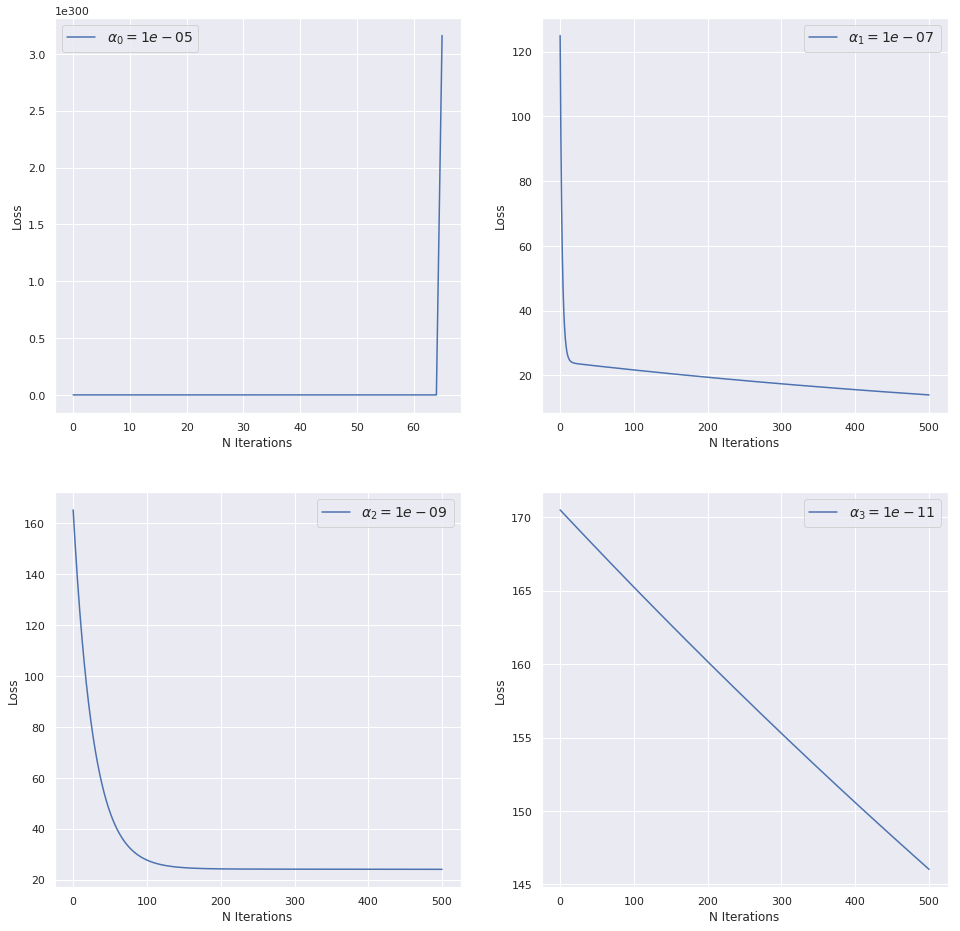

In [19]:
alphas = [1e-5, 1e-7, 1e-9, 1e-11]
w_init = np.zeros(X.shape[1] + 1)  # all weights are zeros at initiation

fig = plt.figure(figsize=(16, 16))
for i, alpha in enumerate(alphas):
    weights, losses = gradDescent(w_init, alpha, X, datY)
    ax = fig.add_subplot(220 + i + 1)
    ax.plot(losses, label=r'$\alpha_{}={}$'.format(i, alpha))
    ax.legend(fontsize=14)
    ax.set_xlabel('N Iterations')
    ax.set_ylabel('Loss')

Let's try to improve the results by using different weights initialisation:

501it [02:52,  2.90it/s]                         
501it [02:50,  2.93it/s]                         
501it [02:55,  2.85it/s]                         
501it [02:52,  2.91it/s]                         


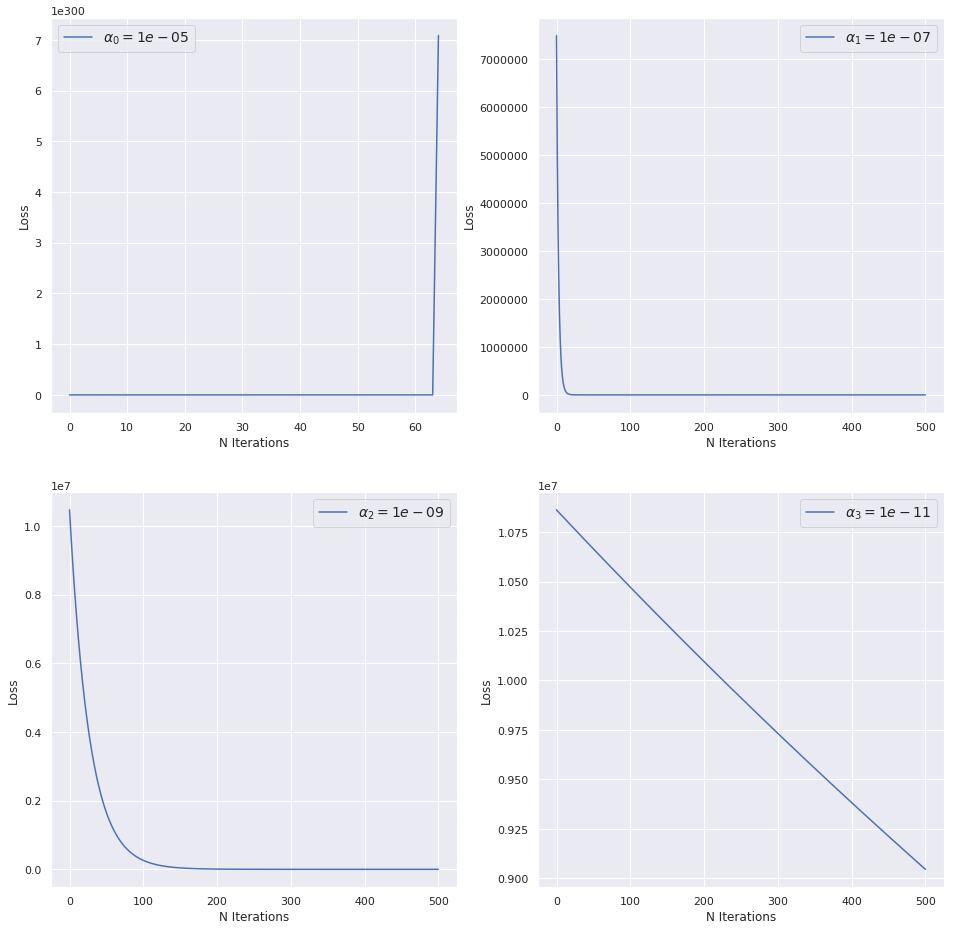

In [20]:
alphas = [1e-5, 1e-7, 1e-9, 1e-11]
w_init = np.random.uniform(0, 1, X.shape[1] + 1)  # all weights initialized randomly

fig = plt.figure(figsize=(16, 16))
for i, alpha in enumerate(alphas):
    weights, losses = gradDescent(w_init, alpha, X, datY)
    ax = fig.add_subplot(220 + i + 1)
    ax.plot(losses, label=r'$\alpha_{}={}$'.format(i, alpha))
    ax.legend(fontsize=14)
    ax.set_xlabel('N Iterations')
    ax.set_ylabel('Loss')

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

From the experiments above it can be seen that the random weight initialisation works better than zero weights at initialisation. Also, we can notice that the learning rate $\alpha=1e-7$ gives the best results in terms of the speed of convergence.

Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

In [21]:
def plot_prices(y_pred, y_true):
    '''Helper function for plotting actual prices vs predictions'''
    x = np.arange(len(y_pred))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 8))
    rects1 = ax.bar(x - width/2, y_pred.round(1), width, label=r'$\hat{y}_i$')
    rects2 = ax.bar(x + width/2, y_true.round(1), width, label=r'$y_i$')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Price')
    ax.set_title('Predicted vs actual prices')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

In [22]:
# take first 10 observations
X_small = np.concatenate([np.ones((10, 1)), X[:10]], axis=1)
y_small = datY[:10]

# take best alpha and initialise weights
alpha = 1e-7
w_init = np.random.uniform(0, 1, X.shape[1] + 1)

In [23]:
# get optimised weights
weights, losses = gradDescent(w_init, alpha, X, datY)
w_k = weights[-1]
# get estimated prices
y_hat = X_small @ w_k

501it [02:54,  2.87it/s]                         


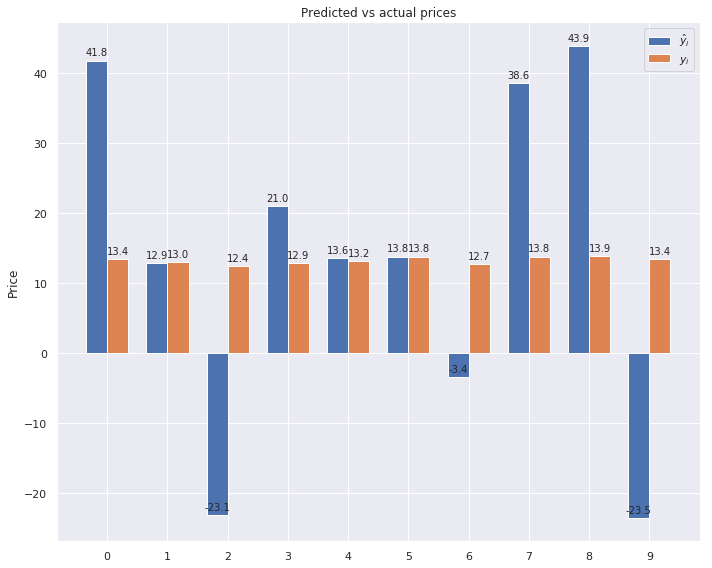

In [24]:
plot_prices(y_hat, y_small)

Let's check if we can get better estimations by increasing the number of iterations

In [25]:
# get optimised weights
weights, losses = gradDescent(w_init, alpha, X, datY, maxiter=1500)
w_k = weights[-1]
# get estimated prices
y_hat = X_small @ w_k

1501it [08:41,  2.88it/s]                          


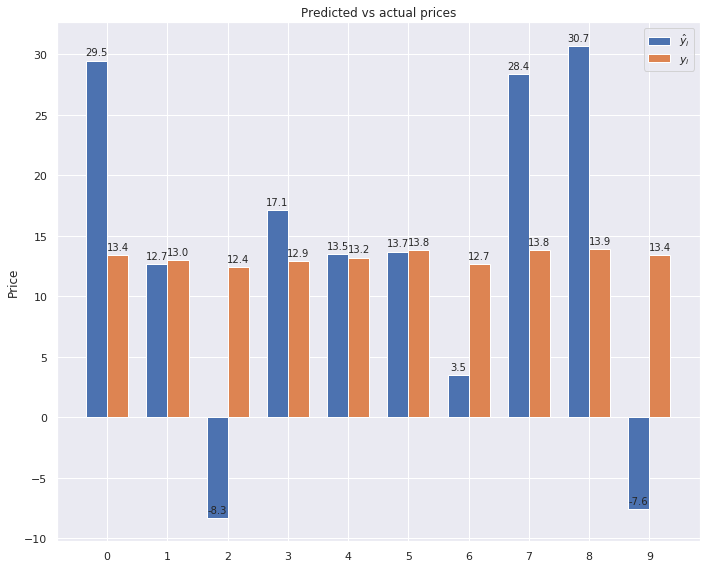

In [26]:
plot_prices(y_hat, y_small)

We can see from the experiment above that by increasing the number of iterations by 3 times we got better price estimates, but they are still quite off.

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [27]:
def norm(X):
    # your code goes here
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    return X

Run the following cell to automatically check your function. 

In [28]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("OUwhX", grading_utils.test_norm(norm(X)))

In [29]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

In [30]:
X_norm = norm(X)

# optimised weights with non normalised data
w_optimised = w_k.copy()

 91%|█████████ | 454/500 [02:35<00:15,  2.92it/s]
501it [02:45,  3.03it/s]                         
501it [02:53,  2.89it/s]                         


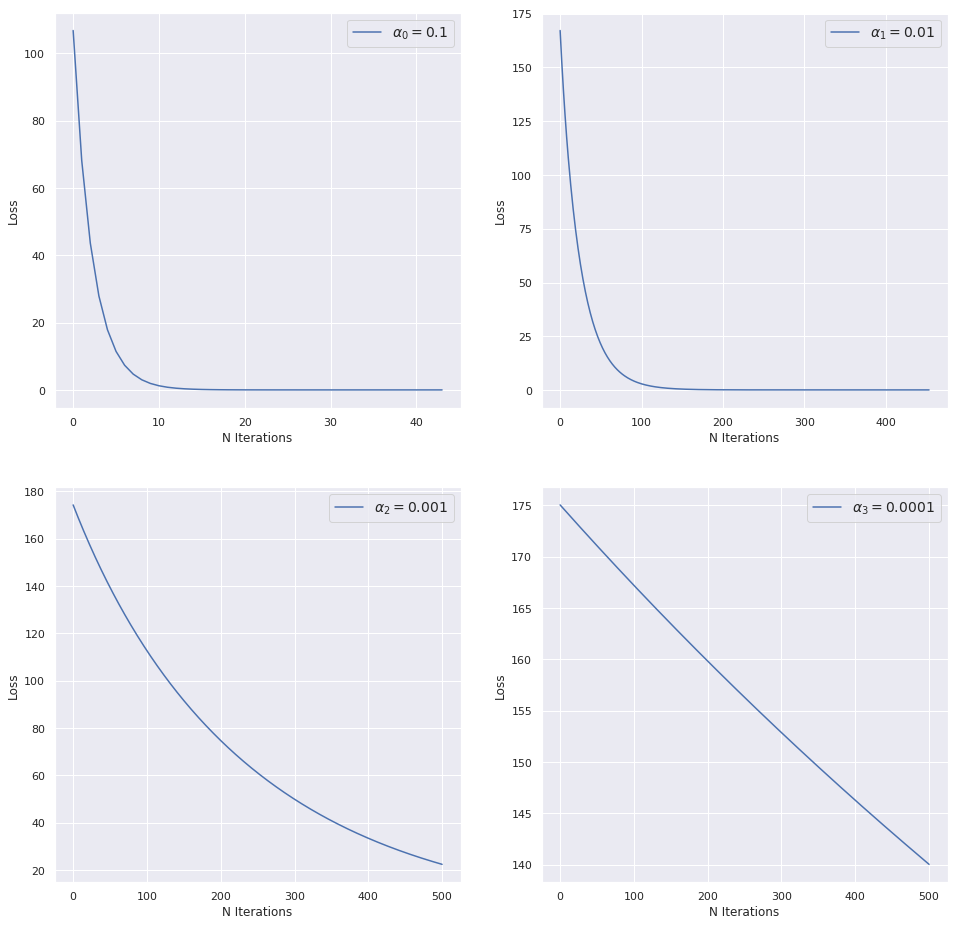

In [31]:
alphas = [0.1, 0.01, 0.001, 0.0001]
w_init = np.random.uniform(0, 1, X_norm.shape[1] + 1)  # all weights initialized randomly

fig = plt.figure(figsize=(16, 16))
for i, alpha in enumerate(alphas):
    weights, losses = gradDescent(w_init, alpha, X_norm, datY)
    ax = fig.add_subplot(220 + i + 1)
    ax.plot(losses, label=r'$\alpha_{}={}$'.format(i, alpha))
    ax.legend(fontsize=14)
    ax.set_xlabel('N Iterations')
    ax.set_ylabel('Loss')

We can see that for the normalised data gradient descent converges much faster with a higher alpha.

In [32]:
def plot_weights(w, w_norm):
    '''Helper function for plotting optimised weights with normalised data and not'''
    x = np.arange(len(w))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 8))
    rects1 = ax.bar(x - width/2, w.round(1), width, label=r'w')
    rects2 = ax.bar(x + width/2, w_norm.round(1), width, label=r'w_norm')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Weight Value')
    ax.set_title('Optimised weights with normalised data and not')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

In [47]:
# take first 10 observations
X_small = np.concatenate([np.ones((10, 1)), X_norm[:10]], axis=1)
y_small = datY[:10]

# take best alpha and initialise weights
alpha = 0.1
w_init = np.random.uniform(0, 1, X.shape[1] + 1)

In [48]:
# get optimised weights
weights, losses = gradDescent(w_init, alpha, X_norm, datY)
w_k = weights[-1]
# get estimated prices
y_hat = X_small @ w_k

 12%|█▏        | 58/500 [00:18<02:20,  3.14it/s]


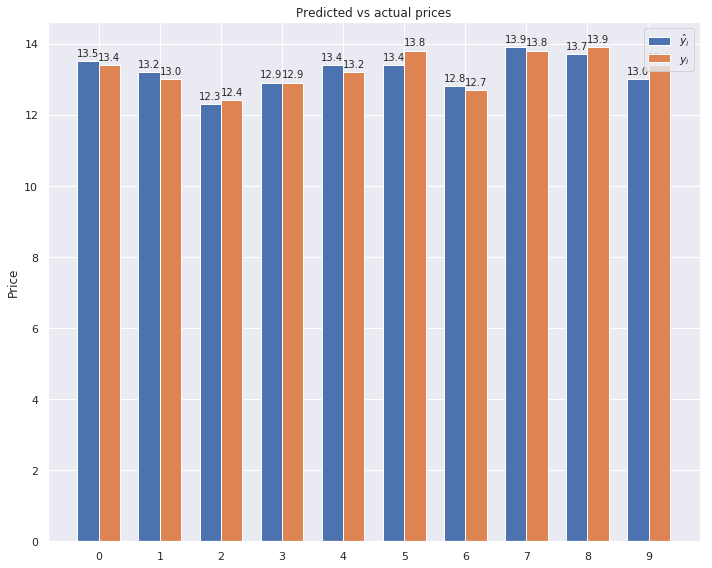

In [49]:
plot_prices(y_hat, y_small)

In [50]:
w_optimised_norm = w_k.copy()

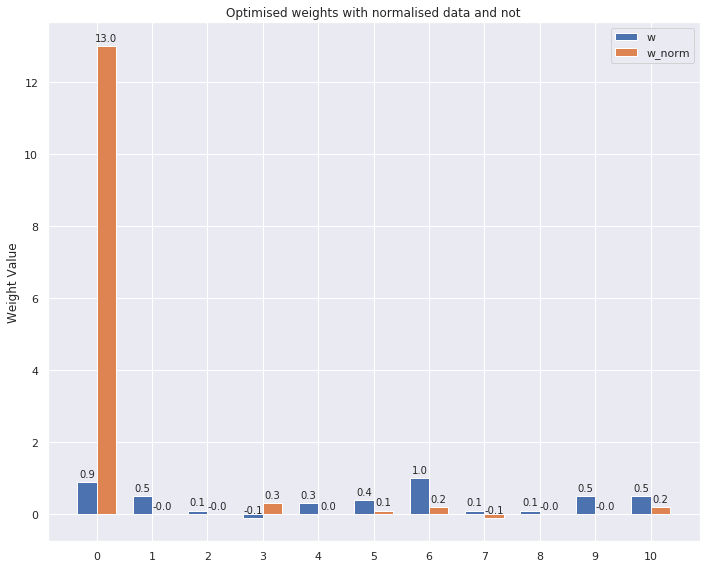

In [51]:
plot_weights(w_optimised, w_optimised_norm)

From the experiment above we can see that the optimised weights for normalised data are quite similar with the only exception of $w_0$

### Task 8. Better pay twice (2 points)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [37]:
def new_loss(w, X, y, a, b):
    #your code goes here
    X0 = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y_hat = X0 @ w
    loss = np.power(y - y_hat, 2)
    loss[y > y_hat] *= a
    loss[y <= y_hat] *= b
    lossValue = 1 / X.shape[0] * np.sum(loss)
    return lossValue

def new_grad(w_k, X, y, a, b):
    #your code goes here
    X0 = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    y_hat = X0 @ w_k
    loss = y_hat - y
    loss[y > y_hat] *= a
    loss[y <= y_hat] *= b
    lossGradient = 2 / X.shape[0] * X0.T @ loss 
    return lossGradient

Run the following cells to automatically check results of your code.

In [38]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("vjKMj", grading_utils.test_new_loss(new_loss, X_norm, datY))

In [39]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


Run the following cells to automatically check results of your code.

In [40]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("uWwHK", grading_utils.test_new_grad(new_grad, X_norm, datY))

In [41]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [42]:
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses = []
    weights = [w_init]
    
    curiter = 0
    w_k = weights[-1]
    
    #your code goes here
    pbar = tqdm(total=maxiter)
    while curiter <= maxiter:
        gradient = new_grad(w_k, X, y, a, b)
        
        # checking if gradient is low enough
        if np.linalg.norm(gradient) < eps:
            break
        
        w_k = w_k - alpha * gradient
        lossValue_k = new_loss(w_k, X, y, a, b)
        
        weights.append(w_k)
        losses.append(lossValue_k)
        
        pbar.update(1)
        curiter += 1
    
    pbar.close()
    return weights, losses

 47%|████▋     | 235/500 [01:24<01:35,  2.79it/s]


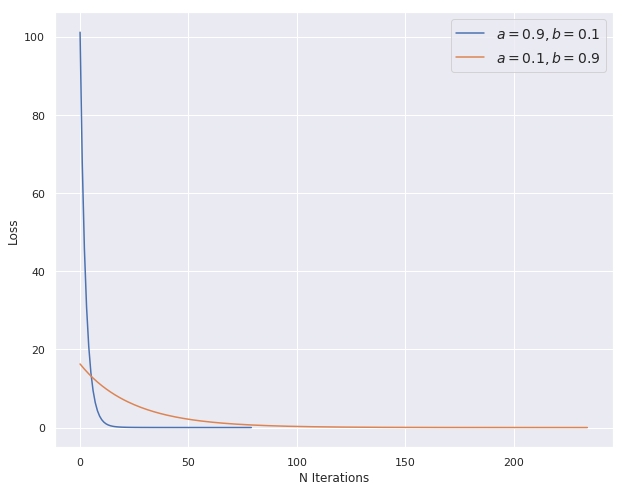

In [43]:
alpha = 0.1
w_init = np.random.uniform(0, 1, X_norm.shape[1] + 1)
a_b_pairs = [(0.9, 0.1), (0.1, 0.9)]

optimised_weights = []  # will be needed later for comparing weights

fig, ax = plt.subplots(figsize=(10, 8))
for i, a_b_pair in enumerate(a_b_pairs):
    weights, losses = new_gradDescent(w_init, alpha, X_norm, datY, *a_b_pair)
    optimised_weights.append(weights[-1])
    ax.plot(losses, label=r'$a={},b={}$'.format(*a_b_pair))
    
ax.legend(fontsize=14)
ax.set_xlabel('N Iterations')
ax.set_ylabel('Loss')
plt.show()

In [52]:
def plot_weights_for_pairs(w0, w1):
    '''Helper function for plotting optimised weights for different (a, b) pairs'''
    x = np.arange(len(w0))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 8))
    rects1 = ax.bar(x - width/2, w0.round(1), width, label=r'$w_0$')
    rects2 = ax.bar(x + width/2, w1.round(1), width, label=r'$w_1$')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Weight Value')
    ax.set_title('Optimised weights for different $(a, b)$')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

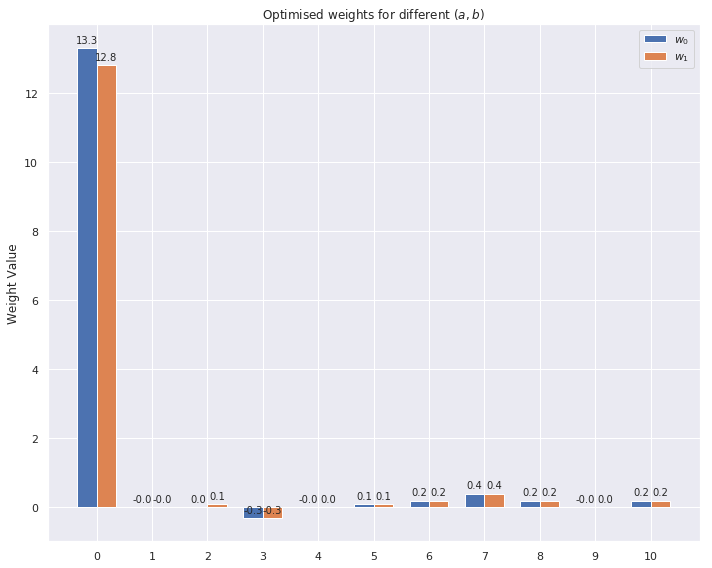

In [53]:
plot_weights_for_pairs(optimised_weights[0], optimised_weights[1])

### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

1. Although with $a_1/b_1>1$ optimisation process converges faster than for $a_2/b_2<1$, final weights do not differ too much. It might be explained that MSE as a loss function is convex by nature and therefore we are able to reach its minima. Therefore, despite different $(a,b)$ final weights at minima should be more or less similar.

2. Assuming $a=1$ we can run calculations for a range of possible values for $b$ and choose the one that converges faster given that final weights should not differ too much.
